# Introduction to Pandas

**`pandas`** is a Python package providing ***fast, flexible, and expressive data structures*** designed to work with *relational* or *labeled* data or both. 

<br></br> <br></br>


<center>*It is a fundamental high-level building block for doing practical, real world data analysis in Python.*</center> 

##### <center>..... and cooking with data!</center>

Pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set some Pandas options
pd.set_option('notebook_repr_html', False)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

## Pandas Data Structures

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [3]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

Getting values out of a series:

In [4]:
counts.values

array([ 632, 1638,  569,  115])

Getting indexes of the series:

In [5]:
counts.index

RangeIndex(start=0, stop=4, step=1)

### Example 1 - Bacteria :

We can assign meaningful labels to the index, if they are available:

In [4]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [7]:
bacteria['Actinobacteria']

569

In [8]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [9]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [10]:
bacteria[0]

632

We can give both the array of values and the index meaningful labels themselves:

In [11]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [12]:
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

We can also filter according to the values in the `Series`:

In [13]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [14]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [15]:
bacteria2 = pd.Series(bacteria_dict, index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [16]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [17]:
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

In [18]:
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [19]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

<center><img src="https://samplebusinessresume.com/wp-content/uploads/2018/03/excel-spreadsheet-examples-for-students.png" class="center" alt="Excel" style="width: 800px;"/></center>



In [20]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

   patient          phylum  value
0        1      Firmicutes    632
1        1  Proteobacteria   1638
2        1  Actinobacteria    569
3        1   Bacteroidetes    115
4        2      Firmicutes    433
5        2  Proteobacteria   1130
6        2  Actinobacteria    754
7        2   Bacteroidetes    555

Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [21]:
data[['phylum','value','patient']]

           phylum  value  patient
0      Firmicutes    632        1
1  Proteobacteria   1638        1
2  Actinobacteria    569        1
3   Bacteroidetes    115        1
4      Firmicutes    433        2
5  Proteobacteria   1130        2
6  Actinobacteria    754        2
7   Bacteroidetes    555        2

A `DataFrame` has a second index, representing the columns:

In [22]:
data.columns

Index([u'patient', u'phylum', u'value'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [23]:
data['value']

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [24]:
data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [25]:
type(data.value)

pandas.core.series.Series

In [26]:
type(data[['value']])

pandas.core.frame.DataFrame

Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). If we want access to a row in a `DataFrame`, we index its `ix` (or `loc`) attribute.


In [27]:
data.loc[3]

patient                1
phylum     Bacteroidetes
value                115
Name: 3, dtype: object

Alternatively, we can create a `DataFrame` with a dict of dicts:

In [28]:
data = pd.DataFrame({0: {'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    1: {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    2: {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    3: {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    4: {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    5: {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    6: {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    7: {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}})

In [29]:
data

                  0               1               2              3  \
patient           1               1               1              1   
phylum   Firmicutes  Proteobacteria  Actinobacteria  Bacteroidetes   
value           632            1638             569            115   

                  4               5               6              7  
patient           2               2               2              2  
phylum   Firmicutes  Proteobacteria  Actinobacteria  Bacteroidetes  
value           433            1130             754            555  

We probably want this transposed:

In [30]:
data = data.T
data

  patient          phylum value
0       1      Firmicutes   632
1       1  Proteobacteria  1638
2       1  Actinobacteria   569
3       1   Bacteroidetes   115
4       2      Firmicutes   433
5       2  Proteobacteria  1130
6       2  Actinobacteria   754
7       2   Bacteroidetes   555

Its important to note that the Series returned when a DataFrame is indexed is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [31]:
vals = data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: object

In [32]:
vals[5] = 0
vals

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: object

In [33]:
data

  patient          phylum value
0       1      Firmicutes   632
1       1  Proteobacteria  1638
2       1  Actinobacteria   569
3       1   Bacteroidetes   115
4       2      Firmicutes   433
5       2  Proteobacteria     0
6       2  Actinobacteria   754
7       2   Bacteroidetes   555

In [34]:
vals = data.value.copy()
vals[5] = 1000
data

  patient          phylum value
0       1      Firmicutes   632
1       1  Proteobacteria  1638
2       1  Actinobacteria   569
3       1   Bacteroidetes   115
4       2      Firmicutes   433
5       2  Proteobacteria     0
6       2  Actinobacteria   754
7       2   Bacteroidetes   555

We can create or modify columns by assignment:

In [35]:
data.value[3] = 14
data

  patient          phylum value
0       1      Firmicutes   632
1       1  Proteobacteria  1638
2       1  Actinobacteria   569
3       1   Bacteroidetes    14
4       2      Firmicutes   433
5       2  Proteobacteria     0
6       2  Actinobacteria   754
7       2   Bacteroidetes   555

In [36]:
data['year'] = 2013
data

  patient          phylum value  year
0       1      Firmicutes   632  2013
1       1  Proteobacteria  1638  2013
2       1  Actinobacteria   569  2013
3       1   Bacteroidetes    14  2013
4       2      Firmicutes   433  2013
5       2  Proteobacteria     0  2013
6       2  Actinobacteria   754  2013
7       2   Bacteroidetes   555  2013

But note, we cannot use the attribute indexing method to add a new column:

In [37]:
data.treatment = 1
data

  patient          phylum value  year
0       1      Firmicutes   632  2013
1       1  Proteobacteria  1638  2013
2       1  Actinobacteria   569  2013
3       1   Bacteroidetes    14  2013
4       2      Firmicutes   433  2013
5       2  Proteobacteria     0  2013
6       2  Actinobacteria   754  2013
7       2   Bacteroidetes   555  2013

In [38]:
data.treatment

1

Specifying a `Series` as a new columns cause its values to be added according to the `DataFrame`'s index:

In [39]:
treatment = pd.Series([0]*4 + [1]*2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [40]:
data['treatment'] = treatment
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013        0.0
1       1  Proteobacteria  1638  2013        0.0
2       1  Actinobacteria   569  2013        0.0
3       1   Bacteroidetes    14  2013        0.0
4       2      Firmicutes   433  2013        1.0
5       2  Proteobacteria     0  2013        1.0
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [42]:
month = ['Jan', 'Feb', 'Mar', 'Apr']
data['month'] = month

ValueError: Length of values does not match length of index

In [43]:
data['month'] = ['Jan']*len(data)
data

  patient          phylum value  year  treatment month
0       1      Firmicutes   632  2013        0.0   Jan
1       1  Proteobacteria  1638  2013        0.0   Jan
2       1  Actinobacteria   569  2013        0.0   Jan
3       1   Bacteroidetes    14  2013        0.0   Jan
4       2      Firmicutes   433  2013        1.0   Jan
5       2  Proteobacteria     0  2013        1.0   Jan
6       2  Actinobacteria   754  2013        NaN   Jan
7       2   Bacteroidetes   555  2013        NaN   Jan

We can use `del` to remove columns, in the same way `dict` entries can be removed:

In [44]:
del data['month']
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013        0.0
1       1  Proteobacteria  1638  2013        0.0
2       1  Actinobacteria   569  2013        0.0
3       1   Bacteroidetes    14  2013        0.0
4       2      Firmicutes   433  2013        1.0
5       2  Proteobacteria     0  2013        1.0
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [45]:
data.values

array([[1, 'Firmicutes', 632, 2013, 0.0],
       [1, 'Proteobacteria', 1638, 2013, 0.0],
       [1, 'Actinobacteria', 569, 2013, 0.0],
       [1, 'Bacteroidetes', 14, 2013, 0.0],
       [2, 'Firmicutes', 433, 2013, 1.0],
       [2, 'Proteobacteria', 0, 2013, 1.0],
       [2, 'Actinobacteria', 754, 2013, nan],
       [2, 'Bacteroidetes', 555, 2013, nan]], dtype=object)

Notice that because of the mix of string and integer (and `NaN`) values, the dtype of the array is `object`. The dtype will automatically be chosen to be as general as needed to accomodate all the columns.

In [46]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})
df.values

array([[ 0.4,  1. ],
       [-1. ,  2. ],
       [ 4.5,  3. ]])

Pandas uses a custom data structure to represent the indices of Series and DataFrames.

In [47]:
data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

Index objects are immutable:

In [48]:
data.index[0] = 15

TypeError: Index does not support mutable operations

This is so that Index objects can be shared between data structures without fear that they will be changed.

In [49]:
bacteria2.index = bacteria.index

In [50]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

Let's start with some more bacteria data, stored in csv format.

In [51]:
!head data/microbiome.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,1174,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,80


This table can be read into a DataFrame using `read_csv`:

In [52]:
mb = pd.read_csv("data/microbiome.csv")
mb.head()

        Taxon  Patient  Tissue  Stool
0  Firmicutes        1     632    305
1  Firmicutes        2     136   4182
2  Firmicutes        3    1174    703
3  Firmicutes        4     408   3946
4  Firmicutes        5     831   8605

Notice that `read_csv` automatically considered the first row in the file to be a header row.

We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.

In [53]:
pd.read_csv("data/microbiome.csv", header=None).head()

            0        1       2      3
0       Taxon  Patient  Tissue  Stool
1  Firmicutes        1     632    305
2  Firmicutes        2     136   4182
3  Firmicutes        3    1174    703
4  Firmicutes        4     408   3946

`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [54]:
mb = pd.read_table("data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [55]:
mb = pd.read_csv("data/microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

                    Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

This is called a *hierarchical* index, which we will revisit later.

If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [56]:
pd.read_csv("data/microbiome.csv", skiprows=[3,4,6]).head()

        Taxon  Patient  Tissue  Stool
0  Firmicutes        1     632    305
1  Firmicutes        2     136   4182
2  Firmicutes        5     831   8605
3  Firmicutes        7     718    717
4  Firmicutes        8     173     33

Conversely, if we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [57]:
pd.read_csv("data/microbiome.csv", nrows=4)

        Taxon  Patient  Tissue  Stool
0  Firmicutes        1     632    305
1  Firmicutes        2     136   4182
2  Firmicutes        3    1174    703
3  Firmicutes        4     408   3946

Alternately, if we want to process our data in reasonable chunks, the `chunksize` argument will return an iterable object that can be employed in a data processing loop. For example, our microbiome data are organized by bacterial phylum, with 15 patients represented in each:

In [58]:
data_chunks = pd.read_csv("data/microbiome.csv", chunksize=15)

mean_tissue = {chunk.Taxon.iloc[0]:chunk.Tissue.mean() for chunk in data_chunks}
  
mean_tissue

{'Actinobacteria': 449.06666666666666,
 'Bacteroidetes': 599.6666666666666,
 'Firmicutes': 684.4,
 'Other': 198.8,
 'Proteobacteria': 2943.0666666666666}

Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [59]:
!head -10 data/microbiome_missing.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA


In [60]:
pd.read_csv("data/microbiome_missing.csv").head(20)

             Taxon  Patient Tissue    Stool
0       Firmicutes        1    632    305.0
1       Firmicutes        2    136   4182.0
2       Firmicutes        3    NaN    703.0
3       Firmicutes        4    408   3946.0
4       Firmicutes        5    831   8605.0
5       Firmicutes        6    693     50.0
6       Firmicutes        7    718    717.0
7       Firmicutes        8    173     33.0
8       Firmicutes        9    228      NaN
9       Firmicutes       10    162   3196.0
10      Firmicutes       11    372 -99999.0
11      Firmicutes       12   4255   4361.0
12      Firmicutes       13    107   1667.0
13      Firmicutes       14      ?    223.0
14      Firmicutes       15    281   2377.0
15  Proteobacteria        1   1638   3886.0
16  Proteobacteria        2   2469   1821.0
17  Proteobacteria        3    839    661.0
18  Proteobacteria        4   4414     18.0
19  Proteobacteria        5  12044     83.0

Above, Pandas recognized `NA` and an empty field as missing data.

In [61]:
pd.isnull(pd.read_csv("data/microbiome_missing.csv")).head(10)

   Taxon  Patient  Tissue  Stool
0  False    False   False  False
1  False    False   False  False
2  False    False    True  False
3  False    False   False  False
4  False    False   False  False
5  False    False   False  False
6  False    False   False  False
7  False    False   False  False
8  False    False   False   True
9  False    False   False  False

Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [62]:
pd.read_csv("data/microbiome_missing.csv", na_values=['?', -99999]).head(20)

             Taxon  Patient   Tissue   Stool
0       Firmicutes        1    632.0   305.0
1       Firmicutes        2    136.0  4182.0
2       Firmicutes        3      NaN   703.0
3       Firmicutes        4    408.0  3946.0
4       Firmicutes        5    831.0  8605.0
5       Firmicutes        6    693.0    50.0
6       Firmicutes        7    718.0   717.0
7       Firmicutes        8    173.0    33.0
8       Firmicutes        9    228.0     NaN
9       Firmicutes       10    162.0  3196.0
10      Firmicutes       11    372.0     NaN
11      Firmicutes       12   4255.0  4361.0
12      Firmicutes       13    107.0  1667.0
13      Firmicutes       14      NaN   223.0
14      Firmicutes       15    281.0  2377.0
15  Proteobacteria        1   1638.0  3886.0
16  Proteobacteria        2   2469.0  1821.0
17  Proteobacteria        3    839.0   661.0
18  Proteobacteria        4   4414.0    18.0
19  Proteobacteria        5  12044.0    83.0

These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

Importing Excel data to Pandas is a two-step process. First, we create an `ExcelFile` object using the path of the file:                                             

In [63]:
mb_file = pd.ExcelFile('data/microbiome/MID1.xls')
mb_file

Then, since modern spreadsheets consist of one or more "sheets", we parse the sheet with the data of interest:

In [64]:
mb1 = mb_file.parse("Sheet 1", header=None)
mb1.columns = ["Taxon", "Count"]
mb1.head()

                                               Taxon  Count
0  Archaea "Crenarchaeota" Thermoprotei Desulfuro...      7
1  Archaea "Crenarchaeota" Thermoprotei Desulfuro...      2
2  Archaea "Crenarchaeota" Thermoprotei Sulfoloba...      3
3  Archaea "Crenarchaeota" Thermoprotei Thermopro...      3
4  Archaea "Euryarchaeota" "Methanomicrobia" Meth...      7

There is now a `read_excel` conveneince function in Pandas that combines these steps into a single call:

In [65]:
mb2 = pd.read_excel('data/microbiome/MID2.xls', sheetname='Sheet 1', header=None)
mb2.head()

/home/sdmohant/.virtualenvs/datascience/local/lib/python2.7/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


                                                   0   1
0  Archaea "Crenarchaeota" Thermoprotei Acidiloba...   2
1  Archaea "Crenarchaeota" Thermoprotei Acidiloba...  14
2  Archaea "Crenarchaeota" Thermoprotei Desulfuro...  23
3  Archaea "Crenarchaeota" Thermoprotei Desulfuro...   1
4  Archaea "Crenarchaeota" Thermoprotei Desulfuro...   2

## Pandas Fundamentals

This section introduces the new user to the key functionality of Pandas that is required to use the software effectively.


### Example 2 - Baseball Data

For some variety, we will leave our digestive tract bacteria behind and employ some baseball data.

In [66]:
baseball = pd.read_csv("data/baseball.csv", index_col='id')
baseball.head()

          player  year  stint team  lg   g  ab  r   h  X2b  X3b  hr  rbi   sb  \
id                                                                              
88641  womacto01  2006      2  CHN  NL  19  50  6  14    1    0   1  2.0  1.0   
88643  schilcu01  2006      1  BOS  AL  31   2  0   1    0    0   0  0.0  0.0   
88645  myersmi01  2006      1  NYA  AL  62   0  0   0    0    0   0  0.0  0.0   
88649  helliri01  2006      1  MIL  NL  20   3  0   0    0    0   0  0.0  0.0   
88650  johnsra05  2006      1  NYA  AL  33   6  0   1    0    0   0  0.0  0.0   

        cs  bb   so  ibb  hbp   sh   sf  gidp  
id                                             
88641  1.0   4  4.0  0.0  0.0  3.0  0.0   0.0  
88643  0.0   0  1.0  0.0  0.0  0.0  0.0   0.0  
88645  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  
88649  0.0   0  2.0  0.0  0.0  0.0  0.0   0.0  
88650  0.0   0  4.0  0.0  0.0  0.0  0.0   0.0  


- id, unique player id
- year, year of data
- stint
- team, team played for
- lg, league
- g, number of games
- ab, number of times at bat
- r, number of runs
- h, hits, times reached base because of a batted, fair ball without error by the defense
- X2b, hits on which the batter reached second base safely
- X3b, hits on which the batter reached third base safely
- hr, number of home runs
- rbi, runs batted in
- sb, stolen bases
- cs, caught stealing
- bb, base on balls (walk)
- so, strike outs
- ibb, intentional base on balls
- hbp, hits by pitch
- sh, sacrifice hits
- sf, sacrifice flies
- gidp, ground into double play


Notice that we specified the `id` column as the index, since it appears to be a unique identifier. We could try to create a unique index ourselves by combining `player` and `year`:

In [67]:
player_id = baseball.player + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_id
baseball_newind.head()

                  player  year  stint team  lg   g  ab  r   h  X2b  X3b  hr  \
womacto012006  womacto01  2006      2  CHN  NL  19  50  6  14    1    0   1   
schilcu012006  schilcu01  2006      1  BOS  AL  31   2  0   1    0    0   0   
myersmi012006  myersmi01  2006      1  NYA  AL  62   0  0   0    0    0   0   
helliri012006  helliri01  2006      1  MIL  NL  20   3  0   0    0    0   0   
johnsra052006  johnsra05  2006      1  NYA  AL  33   6  0   1    0    0   0   

               rbi   sb   cs  bb   so  ibb  hbp   sh   sf  gidp  
womacto012006  2.0  1.0  1.0   4  4.0  0.0  0.0  3.0  0.0   0.0  
schilcu012006  0.0  0.0  0.0   0  1.0  0.0  0.0  0.0  0.0   0.0  
myersmi012006  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  
helliri012006  0.0  0.0  0.0   0  2.0  0.0  0.0  0.0  0.0   0.0  
johnsra052006  0.0  0.0  0.0   0  4.0  0.0  0.0  0.0  0.0   0.0  

This looks okay, but let's check:

In [68]:
baseball_newind.index.is_unique

False

So, indices need not be unique. Our choice is not unique because some players change teams within years.

In [69]:
pd.Series(baseball_newind.index).value_counts()

wickmbo012007    2
gomezch022007    2
sweenma012007    2
claytro012007    2
hernaro012007    2
loftoke012007    2
trachst012007    2
wellsda012007    2
francju012007    2
benitar012007    2
                ..
myersmi012006    1
schilcu012007    1
myersmi012007    1
alomasa022007    1
edmonji012007    1
sheffga012007    1
whiteri012007    1
cormirh012007    1
floydcl012007    1
embreal012007    1
Length: 88, dtype: int64

The most important consequence of a non-unique index is that indexing by label will return multiple values for some labels:

In [70]:
baseball_newind.loc['wickmbo012007']

                  player  year  stint team  lg   g  ab  r  h  X2b  X3b  hr  \
wickmbo012007  wickmbo01  2007      2  ARI  NL   8   0  0  0    0    0   0   
wickmbo012007  wickmbo01  2007      1  ATL  NL  47   0  0  0    0    0   0   

               rbi   sb   cs  bb   so  ibb  hbp   sh   sf  gidp  
wickmbo012007  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  
wickmbo012007  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  

We will learn more about indexing below.

We can create a truly unique index by combining `player`, `team` and `year`:

In [71]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

                     player  year  stint team  lg   g  ab  r   h  X2b  X3b  \
womacto01CHN2006  womacto01  2006      2  CHN  NL  19  50  6  14    1    0   
schilcu01BOS2006  schilcu01  2006      1  BOS  AL  31   2  0   1    0    0   
myersmi01NYA2006  myersmi01  2006      1  NYA  AL  62   0  0   0    0    0   
helliri01MIL2006  helliri01  2006      1  MIL  NL  20   3  0   0    0    0   
johnsra05NYA2006  johnsra05  2006      1  NYA  AL  33   6  0   1    0    0   

                  hr  rbi   sb   cs  bb   so  ibb  hbp   sh   sf  gidp  
womacto01CHN2006   1  2.0  1.0  1.0   4  4.0  0.0  0.0  3.0  0.0   0.0  
schilcu01BOS2006   0  0.0  0.0  0.0   0  1.0  0.0  0.0  0.0  0.0   0.0  
myersmi01NYA2006   0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  
helliri01MIL2006   0  0.0  0.0  0.0   0  2.0  0.0  0.0  0.0  0.0   0.0  
johnsra05NYA2006   0  0.0  0.0  0.0   0  4.0  0.0  0.0  0.0  0.0   0.0  

In [72]:
baseball_newind.index.is_unique

True

We can create meaningful indices more easily using a hierarchical index; for now, we will stick with the numeric `id` field as our index.

### Manipulating indices

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows:

In [73]:
baseball.reindex(baseball.index[::-1]).head()

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr   rbi  \
id                                                                              
89534  alomasa02  2007      1  NYN  NL    8   22   1    3    1    0   0   0.0   
89533   aloumo01  2007      1  NYN  NL   87  328  51  112   19    1  13  49.0   
89530  ausmubr01  2007      1  HOU  NL  117  349  38   82   16    3   3  25.0   
89526  benitar01  2007      1  SFN  NL   19    0   0    0    0    0   0   0.0   
89525  benitar01  2007      2  FLO  NL   34    0   0    0    0    0   0   0.0   

        sb   cs  bb    so  ibb  hbp   sh   sf  gidp  
id                                                   
89534  0.0  0.0   0   3.0  0.0  0.0  0.0  0.0   0.0  
89533  3.0  0.0  27  30.0  5.0  2.0  0.0  3.0  13.0  
89530  6.0  1.0  37  74.0  3.0  6.0  4.0  1.0  11.0  
89526  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  
89525  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  

Notice that the `id` index is not sequential. Say we wanted to populate the table with every `id` value. We could specify and index that is a sequence from the first to the last `id` numbers in the database, and Pandas would fill in the missing data with `NaN` values:

In [74]:
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball.reindex(id_range).head()

          player    year  stint team   lg     g    ab    r     h  X2b  X3b  \
id                                                                           
88641  womacto01  2006.0    2.0  CHN   NL  19.0  50.0  6.0  14.0  1.0  0.0   
88642        NaN     NaN    NaN  NaN  NaN   NaN   NaN  NaN   NaN  NaN  NaN   
88643  schilcu01  2006.0    1.0  BOS   AL  31.0   2.0  0.0   1.0  0.0  0.0   
88644        NaN     NaN    NaN  NaN  NaN   NaN   NaN  NaN   NaN  NaN  NaN   
88645  myersmi01  2006.0    1.0  NYA   AL  62.0   0.0  0.0   0.0  0.0  0.0   

        hr  rbi   sb   cs   bb   so  ibb  hbp   sh   sf  gidp  
id                                                             
88641  1.0  2.0  1.0  1.0  4.0  4.0  0.0  0.0  3.0  0.0   0.0  
88642  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
88643  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  
88644  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
88645  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  

In [75]:
baseball.reindex(id_range, fill_value='mr.nobody', columns=['player']).head()

          player
id              
88641  womacto01
88642  mr.nobody
88643  schilcu01
88644  mr.nobody
88645  myersmi01

Keep in mind that `reindex` does not work if we pass a non-unique index series.

We can remove rows or columns via the `drop` method:

In [76]:
baseball.shape

(100, 22)

In [77]:
baseball.drop([89525, 89526])

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr   rbi  \
id                                                                              
88641  womacto01  2006      2  CHN  NL   19   50   6   14    1    0   1   2.0   
88643  schilcu01  2006      1  BOS  AL   31    2   0    1    0    0   0   0.0   
88645  myersmi01  2006      1  NYA  AL   62    0   0    0    0    0   0   0.0   
88649  helliri01  2006      1  MIL  NL   20    3   0    0    0    0   0   0.0   
88650  johnsra05  2006      1  NYA  AL   33    6   0    1    0    0   0   0.0   
88652  finlest01  2006      1  SFN  NL  139  426  66  105   21   12   6  40.0   
88653  gonzalu01  2006      1  ARI  NL  153  586  93  159   52    2  15  73.0   
88662   seleaa01  2006      1  LAN  NL   28   26   2    5    1    0   0   0.0   
89177  francju01  2007      2  ATL  NL   15   40   1   10    3    0   0   8.0   
89178  francju01  2007      1  NYN  NL   40   50   7   10    0    0   1   8.0   
...          ...   ...    ..

In [78]:
baseball.drop(['ibb','hbp'], axis=1)

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr   rbi  \
id                                                                              
88641  womacto01  2006      2  CHN  NL   19   50   6   14    1    0   1   2.0   
88643  schilcu01  2006      1  BOS  AL   31    2   0    1    0    0   0   0.0   
88645  myersmi01  2006      1  NYA  AL   62    0   0    0    0    0   0   0.0   
88649  helliri01  2006      1  MIL  NL   20    3   0    0    0    0   0   0.0   
88650  johnsra05  2006      1  NYA  AL   33    6   0    1    0    0   0   0.0   
88652  finlest01  2006      1  SFN  NL  139  426  66  105   21   12   6  40.0   
88653  gonzalu01  2006      1  ARI  NL  153  586  93  159   52    2  15  73.0   
88662   seleaa01  2006      1  LAN  NL   28   26   2    5    1    0   0   0.0   
89177  francju01  2007      2  ATL  NL   15   40   1   10    3    0   0   8.0   
89178  francju01  2007      1  NYN  NL   40   50   7   10    0    0   1   8.0   
...          ...   ...    ..

## Indexing and Selection

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [79]:
# Sample Series object
hits = baseball_newind.h
hits.head()

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
helliri01MIL2006     0
johnsra05NYA2006     1
Name: h, dtype: int64

In [80]:
# Numpy-style indexing
hits[:3]

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
Name: h, dtype: int64

In [81]:
# Indexing by label
hits[['womacto01CHN2006','schilcu01BOS2006']]

womacto01CHN2006    14
schilcu01BOS2006     1
Name: h, dtype: int64

We can also slice with data labels, since they have an intrinsic order within the Index:

In [82]:
hits['womacto01CHN2006':'gonzalu01ARI2006']

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
Name: h, dtype: int64

In [83]:
hits['womacto01CHN2006':'gonzalu01ARI2006'] = 5
hits

/home/sdmohant/.virtualenvs/datascience/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


womacto01CHN2006      5
schilcu01BOS2006      5
myersmi01NYA2006      5
helliri01MIL2006      5
johnsra05NYA2006      5
finlest01SFN2006      5
gonzalu01ARI2006      5
seleaa01LAN2006       5
francju01ATL2007     10
francju01NYN2007     10
                   ... 
claytro01TOR2007     48
cirilje01ARI2007      8
cirilje01MIN2007     40
bondsba01SFN2007     94
biggicr01HOU2007    130
benitar01FLO2007      0
benitar01SFN2007      0
ausmubr01HOU2007     82
aloumo01NYN2007     112
alomasa02NYN2007      3
Name: h, Length: 100, dtype: int64

In a `DataFrame` we can slice along either or both axes:

In [84]:
baseball_newind[['h','ab']]

                    h   ab
womacto01CHN2006    5   50
schilcu01BOS2006    5    2
myersmi01NYA2006    5    0
helliri01MIL2006    5    3
johnsra05NYA2006    5    6
finlest01SFN2006    5  426
gonzalu01ARI2006    5  586
seleaa01LAN2006     5   26
francju01ATL2007   10   40
francju01NYN2007   10   50
...               ...  ...
claytro01TOR2007   48  189
cirilje01ARI2007    8   40
cirilje01MIN2007   40  153
bondsba01SFN2007   94  340
biggicr01HOU2007  130  517
benitar01FLO2007    0    0
benitar01SFN2007    0    0
ausmubr01HOU2007   82  349
aloumo01NYN2007   112  328
alomasa02NYN2007    3   22

[100 rows x 2 columns]

In [85]:
baseball_newind[baseball_newind.ab>500]

                     player  year  stint team  lg    g   ab   r    h  X2b  \
gonzalu01ARI2006  gonzalu01  2006      1  ARI  NL  153  586  93    5   52   
vizquom01SFN2007  vizquom01  2007      1  SFN  NL  145  513  54  126   18   
thomafr04TOR2007  thomafr04  2007      1  TOR  AL  155  531  63  147   30   
rodriiv01DET2007  rodriiv01  2007      1  DET  AL  129  502  50  141   31   
griffke02CIN2007  griffke02  2007      1  CIN  NL  144  528  78  146   24   
delgaca01NYN2007  delgaca01  2007      1  NYN  NL  139  538  71  139   30   
biggicr01HOU2007  biggicr01  2007      1  HOU  NL  141  517  68  130   31   

                  X3b  hr   rbi    sb   cs  bb     so   ibb   hbp    sh   sf  \
gonzalu01ARI2006    2  15  73.0   0.0  1.0  69   58.0  10.0   7.0   0.0  6.0   
vizquom01SFN2007    3   4  51.0  14.0  6.0  44   48.0   6.0   1.0  14.0  3.0   
thomafr04TOR2007    0  26  95.0   0.0  0.0  81   94.0   3.0   7.0   0.0  5.0   
rodriiv01DET2007    3  11  63.0   2.0  2.0   9   96.0   1.0   1

The indexing field `loc` allows us to select subsets of rows and columns in an intuitive way:

In [86]:
baseball_newind.loc['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

h       5
X2b    52
X3b     2
hr     15
Name: gonzalu01ARI2006, dtype: object

In [87]:
baseball_newind.ix[['gonzalu01ARI2006','finlest01SFN2006'], 5:8]

/home/sdmohant/.virtualenvs/datascience/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


                    g   ab   r
gonzalu01ARI2006  153  586  93
finlest01SFN2006  139  426  66

In [88]:
baseball_newind.loc[:'myersmi01NYA2006', 'hr']

womacto01CHN2006    1
schilcu01BOS2006    0
myersmi01NYA2006    0
Name: hr, dtype: int64

Similarly, the cross-section method `xs` (not a field) extracts a single column or row *by label* and returns it as a `Series`:

In [89]:
baseball_newind.xs('myersmi01NYA2006')

player    myersmi01
year           2006
stint             1
team            NYA
lg               AL
g                62
ab                0
r                 0
h                 5
X2b               0
            ...    
rbi               0
sb                0
cs                0
bb                0
so                0
ibb               0
hbp               0
sh                0
sf                0
gidp              0
Name: myersmi01NYA2006, Length: 22, dtype: object

## Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as combining baseball statistics across years:

In [90]:
hr2006 = baseball[baseball.year==2006].xs('hr', axis=1)
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball[baseball.year==2007].xs('hr', axis=1)
hr2007.index = baseball.player[baseball.year==2007]

In [91]:
hr2006 = pd.Series(baseball.hr[baseball.year==2006].values, index=baseball.player[baseball.year==2006])
hr2007 = pd.Series(baseball.hr[baseball.year==2007].values, index=baseball.player[baseball.year==2007])

In [92]:
hr_total = hr2006 + hr2007
hr_total.head()

player
alomasa02   NaN
aloumo01    NaN
ausmubr01   NaN
benitar01   NaN
benitar01   NaN
dtype: float64

Pandas' data alignment places `NaN` values for labels that do not overlap in the two Series. In fact, there are only 6 players that occur in both years.

In [93]:
hr_total[hr_total.notnull()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
dtype: float64

While we do want the operation to honor the data labels in this way, we probably do not want the missing values to be filled with `NaN`. We can use the `add` method to calculate player home run totals by using the `fill_value` argument to insert a zero for home runs where labels do not overlap:

In [94]:
hr2007.add(hr2006, fill_value=0)

player
alomasa02     0.0
aloumo01     13.0
ausmubr01     3.0
benitar01     0.0
benitar01     0.0
biggicr01    10.0
bondsba01    28.0
cirilje01     0.0
cirilje01     2.0
claytro01     0.0
             ... 
wellsda01     0.0
wellsda01     0.0
whiteri01     0.0
whitero02     4.0
wickmbo01     0.0
wickmbo01     0.0
williwo02     1.0
witasja01     0.0
womacto01     1.0
zaungr01     10.0
Length: 94, dtype: float64

Operations can also be **broadcast** between rows or columns.

For example, if we subtract the maximum number of home runs hit from the `hr` column, we get how many fewer than the maximum were hit by each player:

In [95]:
baseball.hr - baseball.hr.max()

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
89177   -35
89178   -34
         ..
89499   -34
89501   -35
89502   -33
89521    -7
89523   -25
89525   -35
89526   -35
89530   -32
89533   -22
89534   -35
Name: hr, Length: 100, dtype: int64

Or, looking at things row-wise, we can see how a particular player compares with the rest of the group with respect to important statistics

In [96]:
baseball.loc[89521]["player"]

'bondsba01'

In [97]:
stats = baseball[['h','X2b', 'X3b', 'hr']]
diff = stats - stats.xs(89521)
diff[:10]

        h  X2b  X3b  hr
id                     
88641 -80  -13    0 -27
88643 -93  -14    0 -28
88645 -94  -14    0 -28
88649 -94  -14    0 -28
88650 -93  -14    0 -28
88652  11    7   12 -22
88653  65   38    2 -13
88662 -89  -13    0 -28
89177 -84  -11    0 -28
89178 -84  -14    0 -27

We can also apply functions to each column or row of a `DataFrame`

In [98]:
stats.apply(np.median)

h      8.0
X2b    1.0
X3b    0.0
hr     0.0
dtype: float64

In [99]:
stat_range = lambda x: x.max() - x.min()
stats.apply(stat_range)

h      159
X2b     52
X3b     12
hr      35
dtype: int64

Lets use apply to calculate a meaningful baseball statistics, slugging percentage:

$$SLG = \frac{1B + (2 \times 2B) + (3 \times 3B) + (4 \times HR)}{AB}$$

And just for fun, we will format the resulting estimate.

In [100]:
slg = lambda x: (x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr'])/(x['ab']+1e-6)
baseball.apply(slg, axis=1).apply(lambda x: '%.3f' % x)

id
88641    0.360
88643    0.500
88645    0.000
88649    0.000
88650    0.167
88652    0.394
88653    0.444
88662    0.231
89177    0.325
89178    0.260
         ...  
89499    0.344
89501    0.300
89502    0.386
89521    0.565
89523    0.381
89525    0.000
89526    0.000
89530    0.324
89533    0.524
89534    0.182
Length: 100, dtype: object

## Sorting and Ranking

Pandas objects include methods for re-ordering data.

In [101]:
baseball_newind.sort_index().head()

                     player  year  stint team  lg    g   ab   r    h  X2b  \
alomasa02NYN2007  alomasa02  2007      1  NYN  NL    8   22   1    3    1   
aloumo01NYN2007    aloumo01  2007      1  NYN  NL   87  328  51  112   19   
ausmubr01HOU2007  ausmubr01  2007      1  HOU  NL  117  349  38   82   16   
benitar01FLO2007  benitar01  2007      2  FLO  NL   34    0   0    0    0   
benitar01SFN2007  benitar01  2007      1  SFN  NL   19    0   0    0    0   

                  X3b  hr   rbi   sb   cs  bb    so  ibb  hbp   sh   sf  gidp  
alomasa02NYN2007    0   0   0.0  0.0  0.0   0   3.0  0.0  0.0  0.0  0.0   0.0  
aloumo01NYN2007     1  13  49.0  3.0  0.0  27  30.0  5.0  2.0  0.0  3.0  13.0  
ausmubr01HOU2007    3   3  25.0  6.0  1.0  37  74.0  3.0  6.0  4.0  1.0  11.0  
benitar01FLO2007    0   0   0.0  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  
benitar01SFN2007    0   0   0.0  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  

In [102]:
baseball_newind.sort_index(ascending=False).head()

                     player  year  stint team  lg    g   ab   r   h  X2b  X3b  \
zaungr01TOR2007    zaungr01  2007      1  TOR  AL  110  331  43  80   24    1   
womacto01CHN2006  womacto01  2006      2  CHN  NL   19   50   6   5    1    0   
witasja01TBA2007  witasja01  2007      1  TBA  AL    3    0   0   0    0    0   
williwo02HOU2007  williwo02  2007      1  HOU  NL   33   59   3   6    0    0   
wickmbo01ATL2007  wickmbo01  2007      1  ATL  NL   47    0   0   0    0    0   

                  hr   rbi   sb   cs  bb    so  ibb  hbp   sh   sf  gidp  
zaungr01TOR2007   10  52.0  0.0  0.0  51  55.0  8.0  2.0  1.0  6.0   9.0  
womacto01CHN2006   1   2.0  1.0  1.0   4   4.0  0.0  0.0  3.0  0.0   0.0  
witasja01TBA2007   0   0.0  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  
williwo02HOU2007   1   2.0  0.0  0.0   0  25.0  0.0  0.0  5.0  0.0   1.0  
wickmbo01ATL2007   0   0.0  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  

In [103]:
baseball_newind.sort_index(axis=1).head()

                  X2b  X3b  ab  bb   cs   g  gidp  h  hbp  hr  ibb  lg  \
womacto01CHN2006    1    0  50   4  1.0  19   0.0  5  0.0   1  0.0  NL   
schilcu01BOS2006    0    0   2   0  0.0  31   0.0  5  0.0   0  0.0  AL   
myersmi01NYA2006    0    0   0   0  0.0  62   0.0  5  0.0   0  0.0  AL   
helliri01MIL2006    0    0   3   0  0.0  20   0.0  5  0.0   0  0.0  NL   
johnsra05NYA2006    0    0   6   0  0.0  33   0.0  5  0.0   0  0.0  AL   

                     player  r  rbi   sb   sf   sh   so  stint team  year  
womacto01CHN2006  womacto01  6  2.0  1.0  0.0  3.0  4.0      2  CHN  2006  
schilcu01BOS2006  schilcu01  0  0.0  0.0  0.0  0.0  1.0      1  BOS  2006  
myersmi01NYA2006  myersmi01  0  0.0  0.0  0.0  0.0  0.0      1  NYA  2006  
helliri01MIL2006  helliri01  0  0.0  0.0  0.0  0.0  2.0      1  MIL  2006  
johnsra05NYA2006  johnsra05  0  0.0  0.0  0.0  0.0  4.0      1  NYA  2006  

We can also use `order` to sort a `Series` by value, rather than by label.

In [104]:
baseball.hr.sort_values(ascending=False)

id
89360    35
89462    30
89521    28
89361    26
89378    25
89489    24
89371    21
89374    21
89396    20
89439    20
         ..
89460     0
89375     0
89465     0
89372     0
89467     0
89370     0
89367     0
89469     0
89365     0
89534     0
Name: hr, Length: 100, dtype: int64

For a `DataFrame`, we can sort according to the values of one or more columns using the `by` argument of `sort_index`:

In [105]:
baseball[['player','sb','cs']].sort_index(ascending=[False,True], by=['sb', 'cs']).head(10)

/home/sdmohant/.virtualenvs/datascience/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


          player    sb   cs
id                         
89378  sheffga01  22.0  5.0
89430  loftoke01  21.0  4.0
89347  vizquom01  14.0  6.0
89463  greensh01  11.0  1.0
88652  finlest01   7.0  0.0
89462  griffke02   6.0  1.0
89530  ausmubr01   6.0  1.0
89466  gonzalu01   6.0  2.0
89521  bondsba01   5.0  0.0
89438  kleskry01   5.0  1.0

**Ranking** does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [106]:
baseball.hr.rank()

id
88641    62.5
88643    29.0
88645    29.0
88649    29.0
88650    29.0
88652    76.0
88653    89.5
88662    29.0
89177    29.0
89178    62.5
         ... 
89499    62.5
89501    29.0
89502    69.0
89521    98.0
89523    83.5
89525    29.0
89526    29.0
89530    71.5
89533    88.0
89534    29.0
Name: hr, Length: 100, dtype: float64

Ties are assigned the mean value of the tied ranks, which may result in decimal values.

In [107]:
pd.Series([100,100]).rank()

0    1.5
1    1.5
dtype: float64

Alternatively, you can break ties via one of several methods, such as by the order in which they occur in the dataset:

In [108]:
baseball.hr.rank(method='first')

id
88641    58.0
88643     1.0
88645     2.0
88649     3.0
88650     4.0
88652    75.0
88653    89.0
88662     5.0
89177     6.0
89178    59.0
         ... 
89499    67.0
89501    54.0
89502    70.0
89521    98.0
89523    85.0
89525    55.0
89526    56.0
89530    72.0
89533    88.0
89534    57.0
Name: hr, Length: 100, dtype: float64

Calling the `DataFrame`'s `rank` method results in the ranks of all columns:

In [109]:
baseball.rank(ascending=False).head()

       player  year  stint  team    lg     g    ab     r     h   X2b   X3b  \
id                                                                           
88641     2.0  96.5    7.0  82.0  31.5  70.0  47.5  40.5  39.0  50.5  63.5   
88643    37.5  96.5   57.0  88.0  81.5  55.5  73.0  81.0  63.5  78.0  63.5   
88645    47.5  96.5   57.0  40.5  81.5  36.0  91.0  81.0  84.5  78.0  63.5   
88649    66.0  96.5   57.0  47.0  31.5  67.5  69.0  81.0  84.5  78.0  63.5   
88650    61.5  96.5   57.0  40.5  81.5  51.0  64.5  81.0  63.5  78.0  63.5   

         hr   rbi    sb    cs    bb    so   ibb   hbp    sh    sf  gidp  
id                                                                       
88641  38.5  51.0  24.5  17.5  44.5  59.0  66.0  65.5  16.0  70.0  76.5  
88643  72.0  78.5  63.5  62.5  79.0  73.0  66.0  65.5  67.5  70.0  76.5  
88645  72.0  78.5  63.5  62.5  79.0  89.0  66.0  65.5  67.5  70.0  76.5  
88649  72.0  78.5  63.5  62.5  79.0  67.0  66.0  65.5  67.5  70.0  76.5  
88650  72

In [110]:
baseball[['r','h','hr']].rank(ascending=False).head()

          r     h    hr
id                     
88641  40.5  39.0  38.5
88643  81.0  63.5  72.0
88645  81.0  84.5  72.0
88649  81.0  84.5  72.0
88650  81.0  63.5  72.0

## Hierarchical indexing

In the baseball example, I was forced to combine 3 fields to obtain a unique index that was not simply an integer value. A more elegant way to have done this would be to create a hierarchical index from the three fields.

In [111]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

                     stint  lg    g   ab   r    h  X2b  X3b  hr   rbi   sb  \
year team player                                                             
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1   2.0  1.0   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0   0.0  0.0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0   0.0  0.0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0   0.0  0.0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0   0.0  0.0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6  40.0  7.0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15  73.0  0.0   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0   0.0  0.0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0   8.0  0.0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1   8.0  2.0   

                      cs  bb    so   ibb  hbp   sh   sf  gidp  

This index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.

In [112]:
baseball_h.index[:10]

MultiIndex(levels=[[2006, 2007], [u'ARI', u'ATL', u'BAL', u'BOS', u'CHA', u'CHN', u'CIN', u'CLE', u'COL', u'DET', u'FLO', u'HOU', u'KCA', u'LAA', u'LAN', u'MIL', u'MIN', u'NYA', u'NYN', u'OAK', u'PHI', u'SDN', u'SFN', u'SLN', u'TBA', u'TEX', u'TOR'], [u'alomasa02', u'aloumo01', u'ausmubr01', u'benitar01', u'biggicr01', u'bondsba01', u'cirilje01', u'claytro01', u'clemero02', u'coninje01', u'cormirh01', u'delgaca01', u'easleda01', u'edmonji01', u'embreal01', u'finlest01', u'floydcl01', u'francju01', u'glavito02', u'gomezch02', u'gonzalu01', u'gordoto01', u'graffto01', u'greensh01', u'griffke02', u'guarded01', u'helliri01', u'hernaro01', u'hoffmtr01', u'johnsra05', u'jonesto02', u'kentje01', u'kleskry01', u'loaizes01', u'loftoke01', u'mabryjo01', u'maddugr01', u'martipe02', u'mesajo01', u'moyerja01', u'mussimi01', u'myersmi01', u'oliveda02', u'parkch01', u'perezne01', u'piazzmi01', u'ramirma02', u'rodriiv01', u'rogerke01', u'sandere02', u'schilcu01', u'schmija01', u'seaneru01', u'seleaa01

In [113]:
baseball_h.index.is_unique

True

In [114]:
baseball_h.loc[(2007, 'ATL', 'francju01')]

stint     2
lg       NL
g        15
ab       40
r         1
h        10
X2b       3
X3b       0
hr        0
rbi       8
sb        0
cs        0
bb        4
so       10
ibb       1
hbp       0
sh        0
sf        1
gidp      1
Name: (2007, ATL, francju01), dtype: object

## Missing data

The occurence of missing data is so prevalent that it pays to use tools like Pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [115]:
foo = pd.Series([np.nan, -3, None, 'foobar'])
foo

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [116]:
foo.isnull()

0     True
1    False
2     True
3    False
dtype: bool

### Coming back to Example 1 - Bacteria  

#### `dropna`

Missing values may be dropped or indexed out:

In [117]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [118]:
bacteria2.dropna()

phylum
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [119]:
bacteria2[bacteria2.notnull()]

phylum
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

By default, `dropna` drops entire rows in which one or more values are missing.

In [120]:
data

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013        0.0
1       1  Proteobacteria  1638  2013        0.0
2       1  Actinobacteria   569  2013        0.0
3       1   Bacteroidetes    14  2013        0.0
4       2      Firmicutes   433  2013        1.0
5       2  Proteobacteria     0  2013        1.0
6       2  Actinobacteria   754  2013        NaN
7       2   Bacteroidetes   555  2013        NaN

In [121]:
data.dropna()

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013        0.0
1       1  Proteobacteria  1638  2013        0.0
2       1  Actinobacteria   569  2013        0.0
3       1   Bacteroidetes    14  2013        0.0
4       2      Firmicutes   433  2013        1.0
5       2  Proteobacteria     0  2013        1.0

This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

In [122]:
data.dropna(how='any')

  patient          phylum value  year  treatment
0       1      Firmicutes   632  2013        0.0
1       1  Proteobacteria  1638  2013        0.0
2       1  Actinobacteria   569  2013        0.0
3       1   Bacteroidetes    14  2013        0.0
4       2      Firmicutes   433  2013        1.0
5       2  Proteobacteria     0  2013        1.0

This can be customized further by specifying how many values need to be present before a row is dropped via the `thresh` argument.

In [123]:
data.loc[7, 'year'] = np.nan
data

  patient          phylum value    year  treatment
0       1      Firmicutes   632  2013.0        0.0
1       1  Proteobacteria  1638  2013.0        0.0
2       1  Actinobacteria   569  2013.0        0.0
3       1   Bacteroidetes    14  2013.0        0.0
4       2      Firmicutes   433  2013.0        1.0
5       2  Proteobacteria     0  2013.0        1.0
6       2  Actinobacteria   754  2013.0        NaN
7       2   Bacteroidetes   555     NaN        NaN

In [124]:
data.dropna(thresh=4)

  patient          phylum value    year  treatment
0       1      Firmicutes   632  2013.0        0.0
1       1  Proteobacteria  1638  2013.0        0.0
2       1  Actinobacteria   569  2013.0        0.0
3       1   Bacteroidetes    14  2013.0        0.0
4       2      Firmicutes   433  2013.0        1.0
5       2  Proteobacteria     0  2013.0        1.0
6       2  Actinobacteria   754  2013.0        NaN

This is typically used in time series applications, where there are repeated measurements that are incomplete for some subjects.

If we want to drop missing values column-wise instead of row-wise, we use `axis=1`.

In [125]:
data.dropna(axis=1)

  patient          phylum value
0       1      Firmicutes   632
1       1  Proteobacteria  1638
2       1  Actinobacteria   569
3       1   Bacteroidetes    14
4       2      Firmicutes   433
5       2  Proteobacteria     0
6       2  Actinobacteria   754
7       2   Bacteroidetes   555

#### `fillna`

Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in Pandas with the `fillna` argument.

In [126]:
bacteria2.fillna(0)

phylum
Firmicutes           0.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [127]:
data.fillna({'year': 2013, 'treatment':2})

  patient          phylum value    year  treatment
0       1      Firmicutes   632  2013.0        0.0
1       1  Proteobacteria  1638  2013.0        0.0
2       1  Actinobacteria   569  2013.0        0.0
3       1   Bacteroidetes    14  2013.0        0.0
4       2      Firmicutes   433  2013.0        1.0
5       2  Proteobacteria     0  2013.0        1.0
6       2  Actinobacteria   754  2013.0        2.0
7       2   Bacteroidetes   555  2013.0        2.0

Notice that `fillna` by default returns a new object with the desired filling behavior, rather than changing the `Series` or  `DataFrame` in place (**in general, we like to do this, by the way!**).

In [128]:
data

  patient          phylum value    year  treatment
0       1      Firmicutes   632  2013.0        0.0
1       1  Proteobacteria  1638  2013.0        0.0
2       1  Actinobacteria   569  2013.0        0.0
3       1   Bacteroidetes    14  2013.0        0.0
4       2      Firmicutes   433  2013.0        1.0
5       2  Proteobacteria     0  2013.0        1.0
6       2  Actinobacteria   754  2013.0        NaN
7       2   Bacteroidetes   555     NaN        NaN

We can alter values in-place using `inplace=True`.

In [129]:
_ = data.year.fillna(2013, inplace=True)
data

  patient          phylum value    year  treatment
0       1      Firmicutes   632  2013.0        0.0
1       1  Proteobacteria  1638  2013.0        0.0
2       1  Actinobacteria   569  2013.0        0.0
3       1   Bacteroidetes    14  2013.0        0.0
4       2      Firmicutes   433  2013.0        1.0
5       2  Proteobacteria     0  2013.0        1.0
6       2  Actinobacteria   754  2013.0        NaN
7       2   Bacteroidetes   555  2013.0        NaN

Missing values can also be interpolated, using any one of a variety of methods:

In [130]:
bacteria2.fillna(method='bfill')

phylum
Firmicutes         632.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

Generally you would like to fill with a mean value:

In [131]:
bacteria2.fillna(bacteria2.mean())

phylum
Firmicutes         946.333333
Proteobacteria     632.000000
Actinobacteria    1638.000000
Bacteroidetes      569.000000
dtype: float64

## Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

#### Baseball Example

In [132]:
baseball.sum()

player    womacto01schilcu01myersmi01helliri01johnsra05f...
year                                                 200692
stint                                                   113
team      CHNBOSNYAMILNYASFNARILANATLNYNTORTBAHOUARIATLM...
lg        NLALALNLALNLNLNLNLNLALALNLNLNLALNLNLNLNLALALNL...
g                                                      5238
ab                                                    13654
r                                                      1869
h                                                      3582
X2b                                                     739
                                ...                        
rbi                                                    1847
sb                                                      138
cs                                                       46
bb                                                     1549
so                                                     2408
ibb                                     

Clearly, `sum` is more meaningful for some columns than others. For methods like `mean` for which application to string variables is not just meaningless, but impossible, these columns are automatically excluded:

In [133]:
baseball.mean()

year     2006.92
stint       1.13
g          52.38
ab        136.54
r          18.69
h          35.82
X2b         7.39
X3b         0.55
hr          4.37
rbi        18.47
sb          1.38
cs          0.46
bb         15.49
so         24.08
ibb         1.77
hbp         1.12
sh          1.38
sf          1.20
gidp        3.54
dtype: float64

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

#### Bacteria Example

In [134]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [135]:
bacteria2.mean()

946.3333333333334

Sometimes we may not want to ignore missing values, and allow the `nan` to propagate.

In [136]:
bacteria2.mean(skipna=False)

nan

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [137]:
baseball.describe()

             year       stint           g          ab          r           h  \
count   100.00000  100.000000  100.000000  100.000000  100.00000  100.000000   
mean   2006.92000    1.130000   52.380000  136.540000   18.69000   35.820000   
std       0.27266    0.337998   48.031299  181.936853   27.77496   50.221807   
min    2006.00000    1.000000    1.000000    0.000000    0.00000    0.000000   
25%    2007.00000    1.000000    9.500000    2.000000    0.00000    0.000000   
50%    2007.00000    1.000000   33.000000   40.500000    2.00000    8.000000   
75%    2007.00000    1.000000   83.250000  243.750000   33.25000   62.750000   
max    2007.00000    2.000000  155.000000  586.000000  107.00000  159.000000   

              X2b         X3b          hr        rbi          sb          cs  \
count  100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
mean     7.390000    0.550000    4.370000   18.47000    1.380000    0.460000   
std     11.117277    1.445124    7.9755

`describe` can detect non-numeric data and sometimes yield useful information about it.

In [138]:
baseball.player.describe()

count           100
unique           82
top       coninje01
freq              2
Name: player, dtype: object

We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

**Covariance**

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [139]:
baseball.hr.cov(baseball.X2b)

69.07646464646464

**Corelation**

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [140]:
baseball.hr.corr(baseball.X2b)

0.7790615182539754

In [141]:
baseball.ab.corr(baseball.h)

0.9942174036272377

In [142]:
baseball.corr()

           year     stint         g        ab         r         h       X2b  \
year   1.000000  0.004384 -0.050874 -0.001360 -0.023315  0.001151 -0.052917   
stint  0.004384  1.000000 -0.257552 -0.216333 -0.209781 -0.206878 -0.196423   
g     -0.050874 -0.257552  1.000000  0.935910  0.910262  0.929292  0.885847   
ab    -0.001360 -0.216333  0.935910  1.000000  0.965609  0.994217  0.952249   
r     -0.023315 -0.209781  0.910262  0.965609  1.000000  0.970560  0.923508   
h      0.001151 -0.206878  0.929292  0.994217  0.970560  1.000000  0.957275   
X2b   -0.052917 -0.196423  0.885847  0.952249  0.923508  0.957275  1.000000   
X3b   -0.246099 -0.085821  0.518663  0.535986  0.500807  0.514245  0.493267   
hr     0.060199 -0.209124  0.802014  0.843308  0.890060  0.855163  0.779062   
rbi    0.042812 -0.205688  0.891563  0.947911  0.941483  0.952320  0.901751   
sb     0.030480 -0.120837  0.492362  0.533536  0.596343  0.530018  0.413655   
cs     0.058296 -0.055425  0.520923  0.577192  0.576

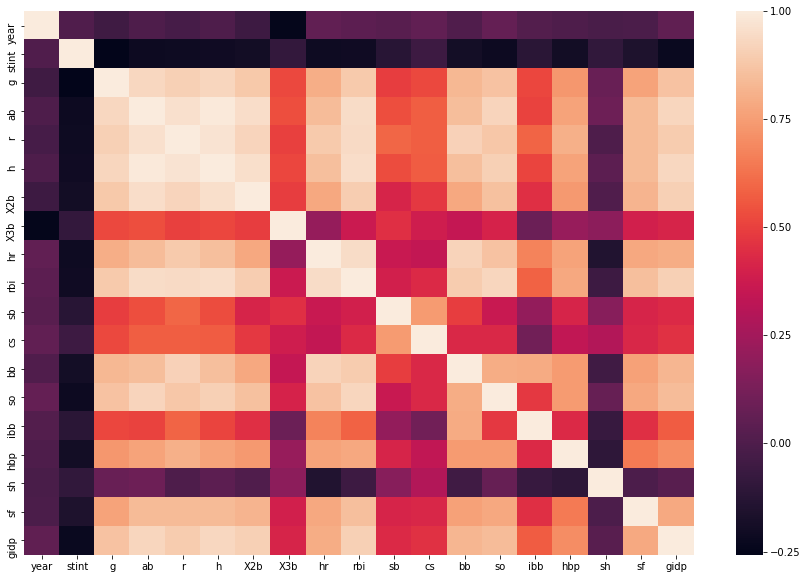

In [143]:
import seaborn as sns
corr = baseball.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)


## Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [144]:
mb.to_csv("mb.csv")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in binary format. Pandas supports this using Python’s built-in pickle serialization.

In [145]:
baseball.to_pickle("baseball_pickle")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [146]:
pd.read_pickle("baseball_pickle")

          player  year  stint team  lg    g   ab   r    h  X2b  X3b  hr   rbi  \
id                                                                              
88641  womacto01  2006      2  CHN  NL   19   50   6   14    1    0   1   2.0   
88643  schilcu01  2006      1  BOS  AL   31    2   0    1    0    0   0   0.0   
88645  myersmi01  2006      1  NYA  AL   62    0   0    0    0    0   0   0.0   
88649  helliri01  2006      1  MIL  NL   20    3   0    0    0    0   0   0.0   
88650  johnsra05  2006      1  NYA  AL   33    6   0    1    0    0   0   0.0   
88652  finlest01  2006      1  SFN  NL  139  426  66  105   21   12   6  40.0   
88653  gonzalu01  2006      1  ARI  NL  153  586  93  159   52    2  15  73.0   
88662   seleaa01  2006      1  LAN  NL   28   26   2    5    1    0   0   0.0   
89177  francju01  2007      2  ATL  NL   15   40   1   10    3    0   0   8.0   
89178  francju01  2007      1  NYN  NL   40   50   7   10    0    0   1   8.0   
...          ...   ...    ..

It is recommended that binary storage of data via pickle only be used as a temporary storage format, in situations where speed is relevant. This is because there is no guarantee that the pickle format will not change with future versions of Python.